In [1]:
# yfinance 패키지 설치
!pip install yfinance --quiet

#현대 포트폴리오 이론

해리 맥스 마코위츠라는 경제학자가 1952년에 발표한 논문 'Portfolio Selections'에 새로운 포트폴리오 구축 방법을 제시했다. 그가 제시한 평균-분산 최적화(MVO)는 예상 수익률과 리스크의 상관관계를 활용해 포트폴리오를 최적화하는 기법이다. MVO, 즉 평균-분산 최적화의 목표는 바로 가장 높은 샤프 비율을 달성할 수 있는 포트폴리오를 구축하는 것이다. 구체적으로 말해서, 이 방법론은 높은 수익률과 낮은 위험을 목표로 하는 효용 함수를 최대화함으로써 포트폴리오 최적화 문제를 풀어낸다.

##효율적 투자선(Efficient Frontier)

효율적 투자선이란 현대 포트폴리오 이론의 핵심 개념으로서, 투자자가 인내할 수 있는 리스크 수준에서 최상의 기대수익률을 제공하는 포트폴리오들의 집합을 나타낸다.

효율적 투자선 위에 위치한 포트폴리오는 주어진 리스크에서 최대 수익을 낸다. '같은 값이면 다홍치마' 라는 말을 떠올린다면 해당 그래프를 이해하기 쉬울 것이다. 이성적인 투자자라면 당연히 효율적 투자선 위에(Pink 점들의 집합) 위치한 포트폴리오에 따라 자산을 배분해야한다. 같은 Volatility에서 최대의 기대수익률을 뽑아낼 수 있기 때문이다.

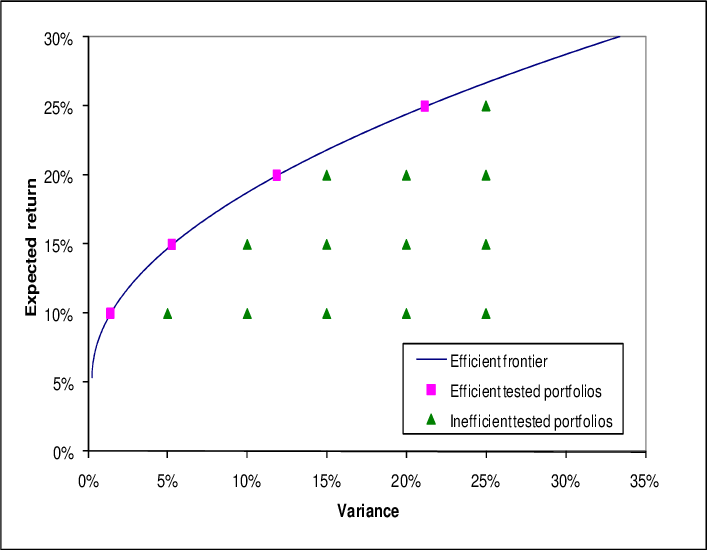

Q: 우리가 얻을 수 있는 투자 인사이트는 무엇인가?

=> 최적의 투자 가중치를 찾을 수 있다. 즉, 같은 위험대비 최적의 기대수익률을 줄 수 있는 가중치를 찾을 수 있다는 뜻이다. 그러면 효율적 경계선 중에서 어떤 가중치를 선택해야될까? 샤프비율이 최대가 되는 점에서 투자를 해야된다.

image.png

x축이 샤프지수의 분모이고 y축이 샤프지수의 분자이기 때문에, 기울기가 가장 큰 값을 찾으면 된다. 우리는 그 점을 찾으면 되는 것이다.

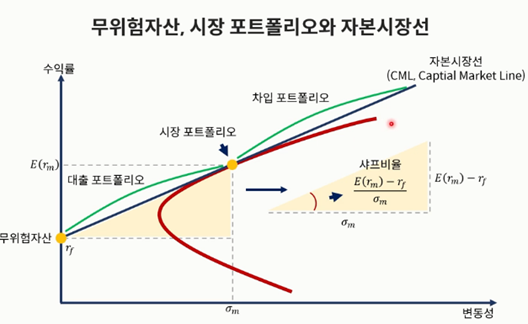


#### 샤프지수란 <br>
https://ecodemy.cafe24.com/sharinde.html


In [34]:
# 패키지 임포트: numpy, pandas, matplotlib, seaborn, yfinance, scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.optimize as sco

# seaborn 세팅하기
sns.set()

#### seaborn <br>

Seaborn is a Python data visualization library based on matplotlib. <br>
It provides a high-level interface for drawing attractive and informative statistical graphics. <br>

https://seaborn.pydata.org/ <br>

#### scipy <br>

Fundamental algorithms for scientific computing in Python <br>

https://scipy.org/

### ETF 가격 데이터 다운로드

In [39]:
# 티커 리스트 정의
tickers = ['SPY', 'GLD', 'BIL', '^FVX', '^TNX', '114820.KS', 'QQQ', 'XLK', 'DRIV','IHI']

# etf 객체 정의
etf = yf.Tickers(tickers)   

etf


yfinance.Tickers object <SPY,GLD,BIL,^FVX,^TNX,114820.KS,QQQ,XLK,DRIV,IHI>

yf.Tickers() <br>

input : ticker 문자열 리스트 <br>
return : Ticker object (일종의 리스트에 추가 기능이 있는 객체인듯 하다)

In [40]:
# ETF 시계열 가격 데이터 다운로드
data = etf.history(start='2010-01-01', actions=False)
#type(data)
data

[*********************100%***********************]  10 of 10 completed


Close                                    \
                               114820.KS        BIL       DRIV         GLD   
Date                                                                         
2010-01-03 15:00:00+00:00   98384.796875        NaN        NaN         NaN   
2010-01-04 05:00:00+00:00            NaN  86.266281        NaN  109.800003   
2010-01-04 15:00:00+00:00   98481.203125        NaN        NaN         NaN   
2010-01-05 05:00:00+00:00            NaN  86.247459        NaN  109.699997   
2010-01-05 15:00:00+00:00   98621.101562        NaN        NaN         NaN   
...                                  ...        ...        ...         ...   
2023-01-27 05:00:00+00:00            NaN  91.720001  23.870001  179.220001   
2023-01-30 05:00:00+00:00            NaN  91.720001  23.320000  178.759995   
2023-01-31 05:00:00+00:00            NaN  91.730003  23.760000  179.410004   
2023-02-01 05:00:00+00:00            NaN  91.400002  24.389999  181.669998   
2023-02-01 15:00:00+00:00  107215.000000        NaN        NaN         NaN   

                                                                          \
                                 IHI         QQQ         SPY         XLK   
Date                                                                       
2010-01-03 15:00:00+00:00        NaN         NaN         NaN         NaN   
2010-01-04 05:00:00+00:00   8.401670   41.068951   88.454201   19.192503   
2010-01-04 15:00:00+00:00        NaN         NaN         NaN         NaN   
2010-01-05 05:00:00+00:00   8.448802   41.068951   88.688339   19.167761   
2010-01-05 15:00:00+00:00        NaN         NaN         NaN         NaN   
...                              ...         ...         ...         ...   
2023-01-27 05:00:00+00:00  54.060001  296.260010  405.679993  136.699997   
2023-01-30 05:00:00+00:00  53.410000  290.269989  400.589996  134.089996   
2023-01-31 05:00:00+00:00  54.000000  294.619995  406.480011  135.960007   
2023-02-01 05:00:00+00:00  55.270000  300.920013  410.799988  139.160004   
2023-02-01 15:00:00+00:00        NaN         NaN         NaN         NaN   

                                         ...    Volume                       \
                            ^FVX   ^TNX  ... 114820.KS        BIL      DRIV   
Date                                     ...                                  
2010-01-03 15:00:00+00:00    NaN    NaN  ...       3.0        NaN       NaN   
2010-01-04 05:00:00+00:00  2.652  3.841  ...       NaN   192800.0       NaN   
2010-01-04 15:00:00+00:00    NaN    NaN  ...    2851.0        NaN       NaN   
2010-01-05 05:00:00+00:00  2.558  3.755  ...       NaN   105600.0       NaN   
2010-01-05 15:00:00+00:00    NaN    NaN  ...       3.0        NaN       NaN   
...                          ...    ...  ...       ...        ...       ...   
2023-01-27 05:00:00+00:00  3.621  3.518  ...       NaN  5227500.0  129500.0   
2023-01-30 05:00:00+00:00  3.683  3.551  ...       NaN  4281500.0  126000.0   
2023-01-31 05:00:00+00:00  3.638  3.529  ...       NaN  7362600.0  197800.0   
2023-02-01 05:00:00+00:00  3.495  3.397  ...       NaN  9421700.0  160400.0   
2023-02-01 15:00:00+00:00    NaN    NaN  ...    1246.0        NaN       NaN   

                                                                           \
                                  GLD        IHI         QQQ          SPY   
Date                                                                        
2010-01-03 15:00:00+00:00         NaN        NaN         NaN          NaN   
2010-01-04 05:00:00+00:00  16224100.0   285000.0  62822800.0  118944600.0   
2010-01-04 15:00:00+00:00         NaN        NaN         NaN          NaN   
2010-01-05 05:00:00+00:00  14213100.0   151800.0  62935600.0  111579900.0   
2010-01-05 15:00:00+00:00         NaN        NaN         NaN          NaN   
...                               ...        ...         ...          ...   
2023-01-27 05:00:00+00:00   5446400.0   591200.0  56161500.0   68280700.0   


yf.history(start = "", actions = bool) <br>

대상 객체 : tickers object <br>
input : {start} date by string,  {actions} 칼럼 갯수를 조절하는 용도 false(45 columns) true(73 colums) <br>
output : pd dataFrame 객체 pandas.core.frame.DataFrame <br>

In [41]:
# 종가 이외의 데이터 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)

data

Close                                    \
                               114820.KS        BIL       DRIV         GLD   
Date                                                                         
2010-01-03 15:00:00+00:00   98384.796875        NaN        NaN         NaN   
2010-01-04 05:00:00+00:00            NaN  86.266281        NaN  109.800003   
2010-01-04 15:00:00+00:00   98481.203125        NaN        NaN         NaN   
2010-01-05 05:00:00+00:00            NaN  86.247459        NaN  109.699997   
2010-01-05 15:00:00+00:00   98621.101562        NaN        NaN         NaN   
...                                  ...        ...        ...         ...   
2023-01-27 05:00:00+00:00            NaN  91.720001  23.870001  179.220001   
2023-01-30 05:00:00+00:00            NaN  91.720001  23.320000  178.759995   
2023-01-31 05:00:00+00:00            NaN  91.730003  23.760000  179.410004   
2023-02-01 05:00:00+00:00            NaN  91.400002  24.389999  181.669998   
2023-02-01 15:00:00+00:00  107215.000000        NaN        NaN         NaN   

                                                                          \
                                 IHI         QQQ         SPY         XLK   
Date                                                                       
2010-01-03 15:00:00+00:00        NaN         NaN         NaN         NaN   
2010-01-04 05:00:00+00:00   8.401670   41.068951   88.454201   19.192503   
2010-01-04 15:00:00+00:00        NaN         NaN         NaN         NaN   
2010-01-05 05:00:00+00:00   8.448802   41.068951   88.688339   19.167761   
2010-01-05 15:00:00+00:00        NaN         NaN         NaN         NaN   
...                              ...         ...         ...         ...   
2023-01-27 05:00:00+00:00  54.060001  296.260010  405.679993  136.699997   
2023-01-30 05:00:00+00:00  53.410000  290.269989  400.589996  134.089996   
2023-01-31 05:00:00+00:00  54.000000  294.619995  406.480011  135.960007   
2023-02-01 05:00:00+00:00  55.270000  300.920013  410.799988  139.160004   
2023-02-01 15:00:00+00:00        NaN         NaN         NaN         NaN   

                                         
                            ^FVX   ^TNX  
Date                                     
2010-01-03 15:00:00+00:00    NaN    NaN  
2010-01-04 05:00:00+00:00  2.652  3.841  
2010-01-04 15:00:00+00:00    NaN    NaN  
2010-01-05 05:00:00+00:00  2.558  3.755  
2010-01-05 15:00:00+00:00    NaN    NaN  
...                          ...    ...  
2023-01-27 05:00:00+00:00  3.621  3.518  
2023-01-30 05:00:00+00:00  3.683  3.551  
2023-01-31 05:00:00+00:00  3.638  3.529  
2023-02-01 05:00:00+00:00  3.495  3.397  
2023-02-01 15:00:00+00:00    NaN    NaN  

[6242 rows x 10 columns]

dataFrame.drop(colums or indexes, inplace = bool, axis 0 or 1)

대상 객체 : dataFrame <br>
input :
* {list } 제거하고자하는 칼럼이나 인덱스들의 리스트<br>
* {inplace } true면 저절로 객체에 재할당이 된다.<br>
* {axis} 0 : 행방향  1 : 열방향 <br>

output : pd dataFrame 객체 pandas.core.frame.DataFrame <br>

In [42]:
# 열 이름 레벨 다운그레이드
data = data.droplevel(0, axis=1)

data

,114820.KS,BIL,DRIV,GLD,IHI,QQQ,SPY,XLK,^FVX,^TNX
Date,,,,,,,,,,
2010-01-03 15:00:00+00:00,98384.796875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04 05:00:00+00:00,NaN,86.266281,NaN,109.800003,8.401670,41.068951,88.454201,19.192503,2.652,3.841
2010-01-04 15:00:00+00:00,98481.203125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 05:00:00+00:00,NaN,86.247459,NaN,109.699997,8.448802,41.068951,88.688339,19.167761,2.558,3.755
2010-01-05 15:00:00+00:00,98621.101562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-27 05:00:00+00:00,NaN,91.720001,23.870001,179.220001,54.060001,296.260010,405.679993,136.699997,3.621,3.518
2023-01-30 05:00:00+00:00,NaN,91.720001,23.320000,178.759995,53.410000,290.269989,400.589996,134.089996,3.683,3.551
2023-01-31 05:00:00+00:00,NaN,91.730003,23.760000,179.410004,54.000000,294.619995,406.480011,135.960007,3.638,3.529


In [43]:
# 수익률 데이터
rets = data.pct_change().fillna(0)

rets

,114820.KS,BIL,DRIV,GLD,IHI,QQQ,SPY,XLK,^FVX,^TNX
Date,,,,,,,,,,
2010-01-03 15:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-04 05:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-04 15:00:00+00:00,0.000980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05 05:00:00+00:00,0.000000,-0.000218,0.000000,-0.000911,0.005610,0.000000,0.002647,-0.001289,-0.035445,-0.022390
2010-01-05 15:00:00+00:00,0.001421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-01-27 05:00:00+00:00,0.000000,0.000109,0.012728,-0.001393,-0.001478,0.009954,0.002298,0.004187,0.009197,0.007157
2023-01-30 05:00:00+00:00,0.000000,0.000000,-0.023042,-0.002567,-0.012024,-0.020219,-0.012547,-0.019093,0.017122,0.009380
2023-01-31 05:00:00+00:00,0.000000,0.000109,0.018868,0.003636,0.011047,0.014986,0.014703,0.013946,-0.012218,-0.006195


https://wikidocs.net/157039

In [44]:
import datetime

start = datetime.datetime.strptime("20110103", "%Y%m%d")
end = datetime.datetime.strptime("20230201", "%Y%m%d")
diff = end - start
what = diff/180    #17나눴다
print(what)

24 days, 12:16:00


In [45]:
# 기대수익률 계산
er = rets.mean(axis=0) * 252   #여기서는 또 axis의 방향을 잘 봐야할것 같다 
                               #252일 투자했을 때 얻을 수 있는 기대수익률 10 퍼센트 언저리 
er

#252는 주말을 뺀 1년, 평균 시장 거래일이다.

114820.KS    0.004183
BIL          0.002336
DRIV         0.029542
GLD          0.026825
IHI          0.086072
QQQ          0.091881
SPY          0.070214
XLK          0.092139
^FVX         0.118036
^TNX         0.053989
dtype: float64

In [46]:
# 공분산행렬 계산
cov = rets.cov() * 252
cov

,114820.KS,BIL,DRIV,GLD,IHI,QQQ,SPY,XLK,^FVX,^TNX
114820.KS,1.433110e-03,-3.877717e-08,-4.904694e-07,-4.453547e-07,-0.000001,-0.000002,-0.000001,-0.000002,-0.000002,-8.963443e-07
BIL,-3.877717e-08,3.772483e-06,-4.538226e-06,-3.350744e-06,-0.000009,-0.000008,-0.000007,-0.000007,-0.000008,-7.775254e-06
DRIV,-4.904694e-07,-4.538226e-06,1.631356e-02,9.783917e-04,0.009183,0.012293,0.010370,0.013179,0.011049,1.004454e-02
GLD,-4.453547e-07,-3.350744e-06,9.783917e-04,1.295521e-02,0.000898,0.000854,0.000701,0.000833,-0.014227,-9.651902e-03
IHI,-1.428999e-06,-8.971656e-06,9.182814e-03,8.978094e-04,0.019970,0.017330,0.015536,0.017631,0.016768,1.389800e-02
QQQ,-1.525435e-06,-8.484987e-06,1.229324e-02,8.536203e-04,0.017330,0.022863,0.017980,0.022966,0.016051,1.422346e-02
SPY,-1.165722e-06,-6.856140e-06,1.036996e-02,7.010530e-04,0.015536,0.017980,0.016362,0.018550,0.018432,1.563713e-02
XLK,-1.529721e-06,-6.724994e-06,1.317888e-02,8.326488e-04,0.017631,0.022966,0.018550,0.024244,0.017384,1.526955e-02
^FVX,-1.959677e-06,-7.506226e-06,1.104886e-02,-1.422698e-02,0.016768,0.016051,0.018432,0.017384,0.216443,1.479668e-01
^TNX,-8.963443e-07,-7.775254e-06,1.004454e-02,-9.651902e-03,0.013898,0.014223,0.015637,0.015270,0.147967,1.201843e-01


### 샤프비율 최대화 포트폴리오 (방법 1)


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

샤프비율 최대화 포트폴리오를 만들기 위해 우리는 
scipy.optimize.minimize 함수를 사용할겁니다. 

우리가 하고 싶은 것은 샤프비율 '최대화'이기 때문에, 최소화 함수를 사용하려면 마이너스 샤프 비율을 '최소화' 시키면 됩니다. 따라서 우리의 목적함수는 Negative Sharpe Ratio 입니다.  

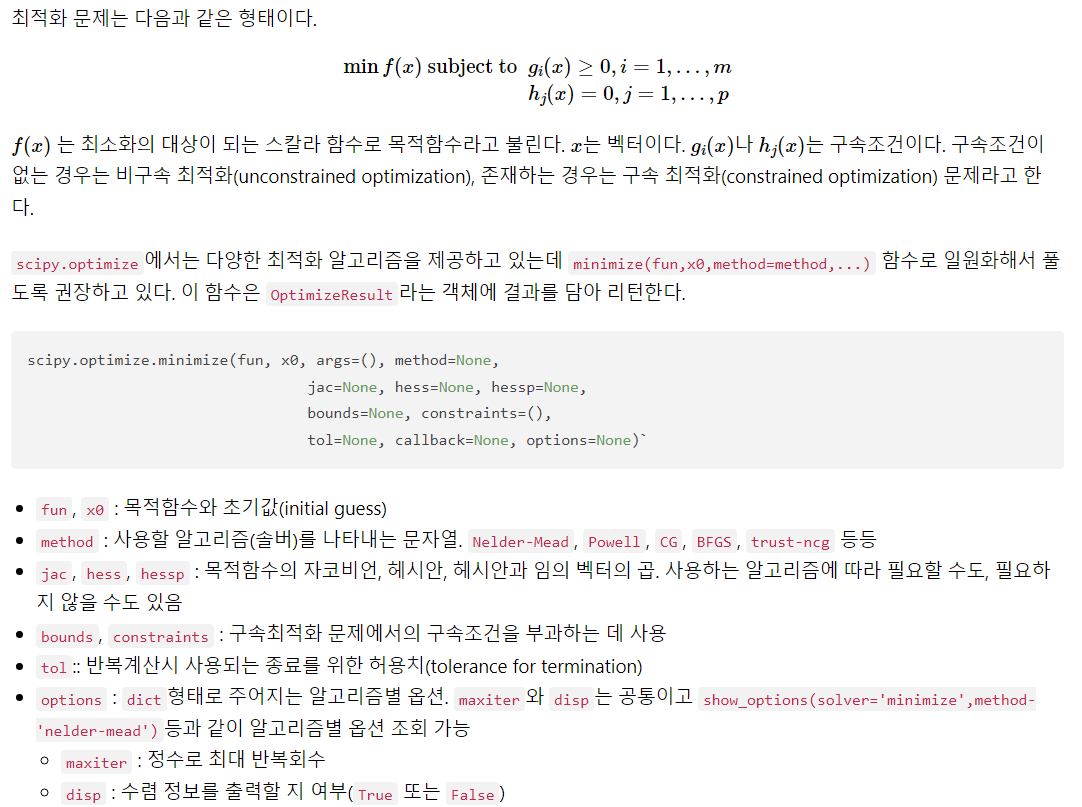

해당 minimize 함수를 사용하기 위해 우리가 필요한 것은 총 5가지다. 
1. 목적함수 : 즉, 최소화하고 싶은 함수
2. 초기값 : 보통 초기값은 동일가중으로 시작하는게 일반적이다. 
ex) 0.111,0.111,0.111,0.111,0.111,0.111 ...
3. 메서드 : 어떤 알고리즘을 이용할건지? 

=> 우리는 최적화를 해줘야하기 때문에 'SLSQP' 알고리즘을 이용할 것이다. 최적화는 특정 집합 위에서 정의된 실숫값, 함수, 정수에 대해 그 값이 최대나 최소가 되는 상태를 해석하는 문제다. 간단히 말하면, 최적의 값을 찾아내는 것을 의미한다.

최적화를 위한 첫걸음은 ‘문제 정의’다. 문제 정의에 필요한 것은 목적함수와 제약조건이다. 여기서 목적함수는 최소화 혹은 최대화가 되는 대상을 의미하고, 제약조건은 결과가 도출돼야 하는 범위 및 조건을 의미한다.

SLSQP(Sequential Least SQuares Programming)는 복잡한 현실 문제를 단순화해 목적함수를 이차식으로 근사해 풀고 다음 번 지점을 예측해 다시 동일한 방법을 수행하는 문제를 푸는 알고리즘으로서 비선형 최적화 문제를 해결할 수 있다. SLSQP는 제약조건(constraint)과 상하한선(bound)이 있는 조건에서 사용할 수 있다.

4. 아규먼트: 함수의 변수에 집어넣는 값. 여기서는 기대수익률이랑 공분산이다.
5. 제약조건(constraint, bounds): 가중치의 합이 1인 것을 넣어준다, 레버리지 불가 조건

=> 우린 여기서 x 값만 있으면 되니까, return res.x 를 사용하면 돤다

minimize 함수의 리턴값이다: 

     fun: -0.9296942694823384
     jac: array([ 3.13897565e-01,  3.60888526e-01,  2.47064307e-01,  1.77554406e-01,
       -2.03676522e-04,  1.28641725e-04,  3.63819301e-04, -3.56733799e-05,
        7.19684884e-02]) 
        message: 'Optimization terminated successfully' 
      success: True
       x: array([8.97223975e-18, 4.64099026e-17, 0.00000000e+00, 0.00000000e+00,
       1.98660313e-01, 1.59236912e-01, 1.07319250e-01, 5.34783525e-01,
       7.38952040e-17])


여기서 우리가 케치해야될 값들은 총 2개다.
1. x 값 : 가중치 값들
2. fun : 가중치 값에 따른 샤프지수


우리는 여기서 가중치 값만 필요하기 때문에, return res.x 를 사용한다.


In [47]:
# 샤프비율 최대화 포트폴리오 가중치 산출 함수 구현
def get_msr_weights(er, cov):

    #자산개수
    noa = er.shape[0] #shape[0] : 열의 갯수 shape[1] : 행의 개수
                      # Returns: tuple of ints

    #가중치 초기값
    init_guess = np.repeat(1/noa, noa) # noa 갯수만큼 1/noa element의 array를 반환한다.

    #자산 가중치 상하한
    bounds = ((0.0, 1.0), ) * noa #튜플 곱셈 , 가중치는 0 ~ 1 사이의 값이어야 한다
    # https://wikidocs.net/15#_7

    #레버리지 불가 제약조건
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}  # 리스트

    #목적함수
    def neg_sharpe(weights, er, cov): # 음의 샤프 비율    ---> 목적함수 
        r = weights.T @ er # 기대수익률            # 가중치(자산 비중) X (항목별 기대 수익률)
        vol = np.sqrt(weights.T @ cov @ weights) #밑에 참고) 달아놓음     
        return - r / vol #이때 무위험수익률은 0이라고 가정한다
    
    #변동성에 공분산이 들어가는 이유 
    # https://swalloow.github.io/portfolio-basic/ 
    # 기대값으로부터의 차이므로 변동성을 의미한다 

    #최적화 수행
    res = sco.minimize(neg_sharpe,                             #sco -> scipy.optimize
                       init_guess,
                       args=(er, cov),
                       method='SLSQP',
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    
    return res.x

참고) 포트폴리오 변동성 구하는 법:

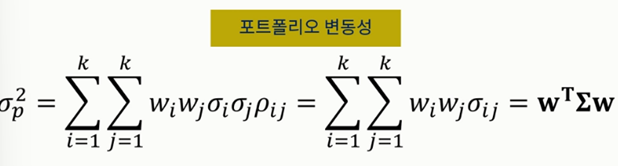


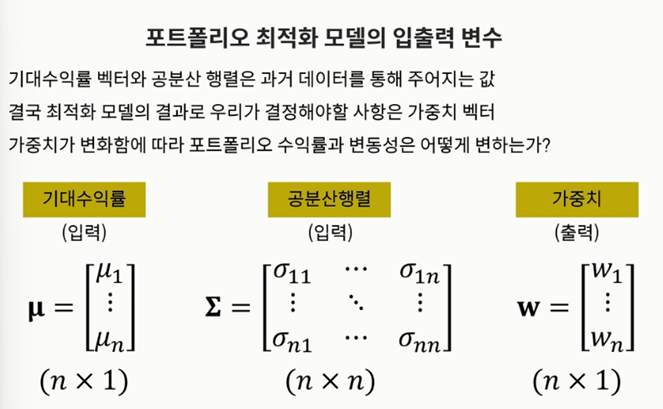

-> 아이패드로 그려서 설명해주기

In [48]:
# MSR 포트폴리오 가중치
msr_weights = get_msr_weights(er, cov) # 최적의 샤프비율을 가지는 가중치 배열 완성 

# MSR 포트폴리오 수익률
msr_ret = np.dot(msr_weights, er) # 연평균 수익률 @ 가중치

print('Return = {}'.format(msr_ret)) # 연간 포트폴리오 수익률

Return = 0.003102638713040324


In [49]:
# MSR 포트폴리오 변동성
msr_vol = np.sqrt(np.dot(msr_weights.T, np.dot(cov, msr_weights)))
print('Volatility = {}'.format(msr_vol))

Volatility = 0.0021975380906187818


In [50]:
#가중치 값을 보기 좋게 Series에 넣기 -> 가중치 백분율 
msr_weights_series = pd.Series(np.round(msr_weights, 4) * 100, index=tickers)
msr_weights_series

SPY           0.46
GLD          98.42
BIL           0.00
^FVX          0.37
^TNX          0.36
114820.KS     0.34
QQQ           0.00
XLK           0.00
DRIV          0.06
IHI           0.00
dtype: float64

##효율적 경계선 시각화:

앞서 실습해본 코드들은 가장 최적의 가중치값을 찾는 작업을 해봤다면,
지금부터는 효율적 경계선을 시각화하기 위한 작업을 실시한다. 사실 코드 자체는 거의 유사하지만, scipy.minimize 함수에 목적함수를 '샤프지수 최적화'를 넣는게 아니고 '포트폴리오 변동성 최적화'를 넣어주면 된다. 나머지 코드들은 다 동일하다.

In [51]:
# 포트폴리오 통계치 계산 함수
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(er * weights)                              # 수익률
    pvol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))  # 변동성
    return np.array([pret, pvol, pret/pvol])                # 수익률, 변동성, 샤프지수

# 목적함수 정의: 포트폴리오 변동성을 낮추는 것!
def obj_func(weights):
    return statistics(weights)[1]      # 위 함수에서 1번 인덱스, 변동성만 반환

In [52]:
# 자산의 개수
noa = len(tickers)

# 수익률 수준별 포트폴리오 최적화 수행
trets = np.linspace(0.1, 0.15, 50) # Total return 10% ~ 15% 사이 값 50개 만들기. 왜 굳이 10% ~ 15% 인가? 그건 어차피 최적의 기대수익률 값이 14.65% 이기 때문에 그정도만 있어도 최적화 그래프를 그릴 수 있기 때문이다.
tvols = []

'''
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]
Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval [start, stop].

The endpoint of the interval can optionally be excluded.

Returns: samplesndarray
'''

for tret in trets:
    '''ex)수익률이 10% 일때 최소 변동성은? => tvols.append(최소 변동성) 
          수익률이 10.01%일때 최소 변동성은? => tvols.append(최소 변동성)
          수익률이 15% 일때 최소 변동성은? => tvols.append(최소 변동성)
    '''
    # 가중치 초기값
    init_guess = np.repeat(1/noa, noa)  #동일 비중

    # 제약조건                                                                                           #이게 뭔지 나중에 찾아보기
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # 자산 가중치 상하한
    bnds = ((0.0, 1.0), ) * noa

    # 최적화 수행
    res = sco.minimize(obj_func,                                                                
                       init_guess,
                       method='SLSQP',
                       bounds=bnds,
                       constraints=cons)
    tvols.append(res['fun'])              # 최 적화 함수의 결과 값중에 fun을 추가 
tvols = np.array(tvols)
tvols   # 50개의 결과 값 -> 최적화된 위험값들 

array([0.19645253, 0.20844799, 0.22103133, 0.23429256, 0.24812313,
       0.26243314, 0.27714838, 0.29220771, 0.3075606 , 0.32316521,
       0.33898701, 0.35499663, 0.3711699 , 0.38748632, 0.40392855,
       0.42048184, 0.43713355, 0.45387287, 0.46523424, 0.46523424,
       0.46523424, 0.46523424, 0.46523424, 0.46523424, 0.46523424,
       0.46523424, 0.46523424, 0.46523424, 0.46523424, 0.46523424,
       0.46523424, 0.46523424, 0.46523424, 0.46523424, 0.46523424,
       0.46523424, 0.46523424, 0.46523424, 0.46523424, 0.46523424,
       0.46523424, 0.46523424, 0.46523424, 0.46523424, 0.46523424,
       0.46523424, 0.46523424, 0.46523424, 0.46523424, 0.46523424])

효율적 경계선을 보면 2차함수를 90도 돌려서 그린것과 비슷하게 생겼다. 이때 밑에 부분을 그리지 않고 자른 이유는 최적의 가중치값들이 아니기 때문이다. 같은 변동성일때 최대의 수익률값을 선택하는 것이 최적이다. 따라서 우리도 가장 변동성이 낮았던 부분을 도출하고 그 이후부터 시각화시켜주면 된다.

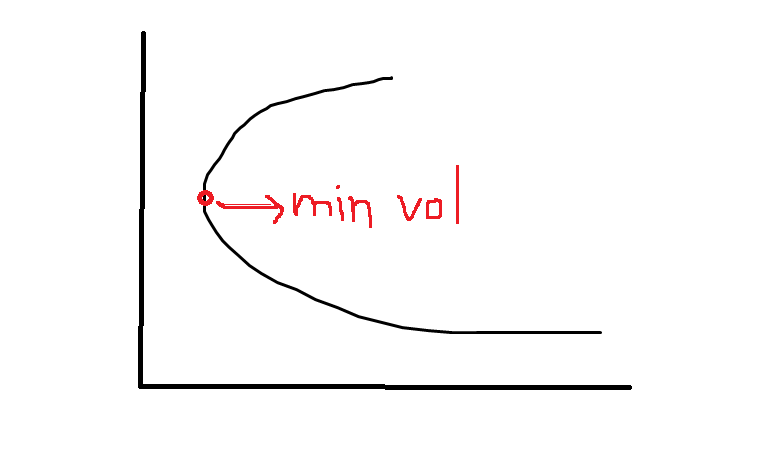

In [53]:
# 좌측 경계선 데이터 수집
ind = np.argmin(tvols) #우리가 위에 for문에서 만들어줬던 tvols 값들중에서 어떤 값이 가장 변동성이 작은지?
# Returns the indices of the minimum values along an axis.
# Returns: index_arrayndarray of ints
evols = tvols[ind:]                      # --> 포물선에서 잘라서 윗 부분만 그려준 것 
erets = trets[ind:]


https://m.blog.naver.com/choi_s_h/221730568009https://m.blog.naver.com/choi_s_h/221730568009

Text(0.5, 1.0, 'Market Portfolio & Capital Market Line')

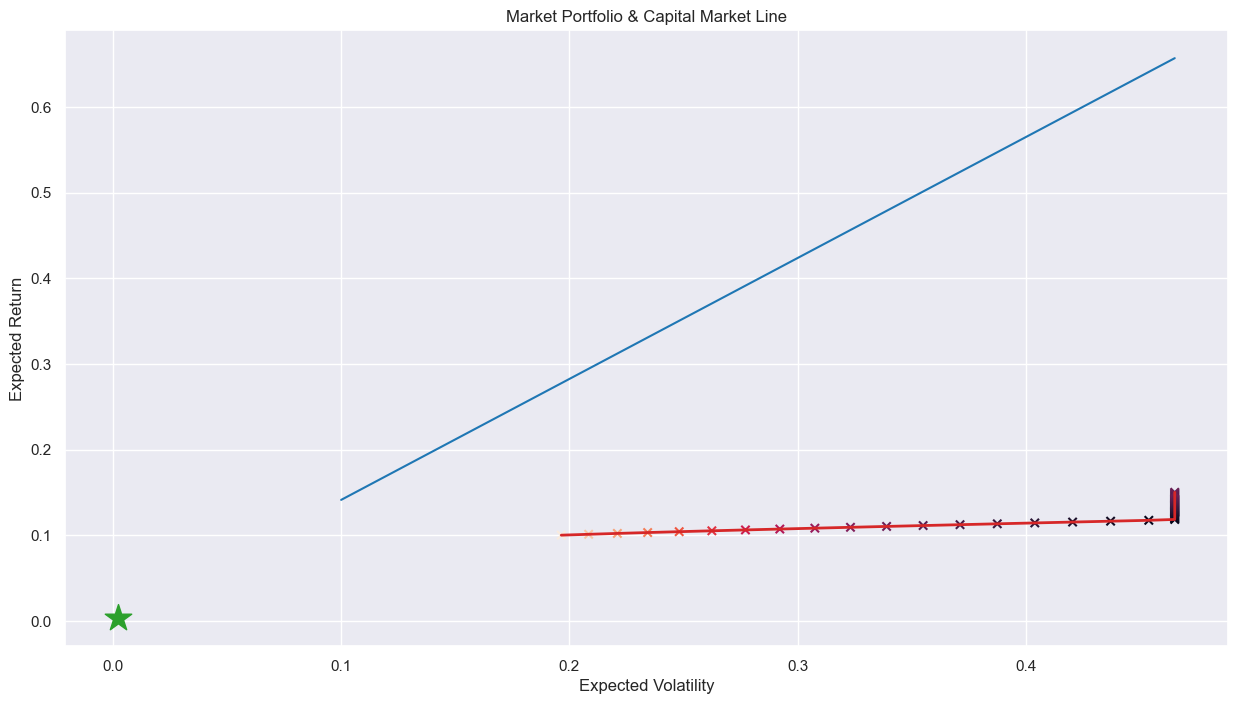

In [54]:
# 자본시장선 데이터
x = np.linspace(0.1, evols[-1], 100) # x축이 변동성
y = (msr_ret / msr_vol) * x  

# 효율적 경계선 및 자본시장선 시각화
plt.figure(figsize=(15, 8))

plt.scatter(tvols, trets, c=trets/tvols, marker='x')
plt.plot(evols, erets, 'tab:red', lw=2.0) #효율적 경계선에 빨간 줄을 긋기 위해 evols 와 erets 값을 정의해준 것것

# 시장 포트폴리오
plt.scatter(msr_vol, msr_ret, marker='*', s=400, color='tab:green')

# 자본시장선
plt.plot(x, y, 'tab:blue')

plt.grid(True)

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.title('Market Portfolio & Capital Market Line')                       #뭔가 문제가 생긴것 같다.. -> 


In [63]:
#msr 포트폴리오의 가중치를 이용해서 누적수익률을 구하고 백테스팅을 해보자

msr_rets = rets.dot(msr_weights)
msr_rets

Date
2010-01-03 15:00:00+00:00    0.000000
2010-01-04 05:00:00+00:00    0.000000
2010-01-04 15:00:00+00:00    0.000004
2010-01-05 05:00:00+00:00   -0.000219
2010-01-05 15:00:00+00:00    0.000006
                               ...   
2023-01-27 05:00:00+00:00    0.000136
2023-01-30 05:00:00+00:00   -0.000110
2023-01-31 05:00:00+00:00    0.000203
2023-02-01 05:00:00+00:00   -0.003362
2023-02-01 15:00:00+00:00   -0.000073
Length: 6242, dtype: float64

2010-01-01 ~ 2023-01-31 누적 수익률: 7.981700368789402 % 


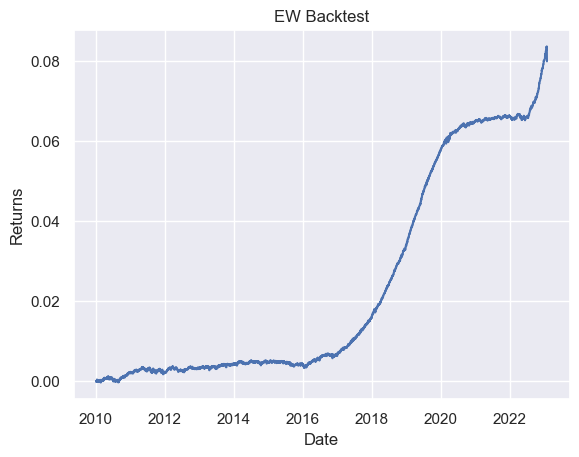

In [64]:
# 포트폴리오 누적 수익률
port_cum_rets = (1 + msr_rets).cumprod() - 1

# 그래프 결과
plt.plot(port_cum_rets)
plt.title('EW Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')




print(f'2010-01-01 ~ 2023-01-31 누적 수익률: {port_cum_rets[-1]*100} % ')


#효율적 경계선 시각화 (방법 2)


몬테카를로 시뮬레이션을 이용하기.

넘파이 random() 함수를 사용해서 각 포트폴리오에 포함된 종목들의 비중을 모두 다르게 한다. 이처럼 매우 많은 난수를 이용해 함수의 값을 확률적으로 계산하는 것을 몬테카를로 시뮬레이션이라고 한다. 몬테카를로 시뮬레이션을 이용해서 포트폴리오 100000 개를 생성한 후 각각의 포트폴리오별로 수익률,리스크,종목 비중을 데이터프레임으로 구하는 코드다.

df 데이터프레임을 산점도로 출력하면, 몬테카를로 시뮬레이션으로 생성한 효율적 투자선을 눈으로 직접 확인할 수 있다.

필요한 값 3가지 : return, volatility, sharpe ratio


In [55]:
port_ret =[]
port_risk = []
port_weights = []
sharpe_ratio = []

for _ in range(100000):
  weights = np.random.random(len(tickers))
  weights /= np.sum(weights)

  returns = np.dot(weights,er)
  risk = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))

  port_ret.append(returns)
  port_risk.append(risk)
  port_weights.append(weights)
  sharpe_ratio.append(returns/risk)
portfolio = {'Returns': port_ret,'Risk': port_risk,'Sharpe': sharpe_ratio}
for i,s in enumerate(tickers):
  portfolio[s] = [weight[i] for weight in port_weights]



#portfolio를 dataframe 에 넣는다
df = pd.DataFrame(portfolio)
df = df[['Returns','Risk','Sharpe']+[s for s in tickers]]

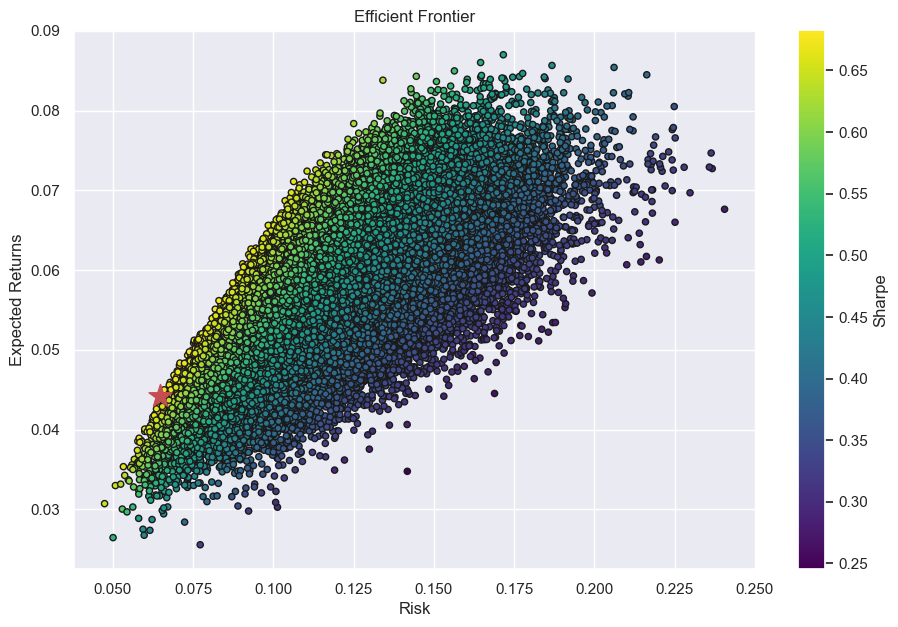

In [56]:
max_sharpe = df.loc[df['Sharpe']==df['Sharpe'].max()]


df.plot.scatter(x='Risk',y='Returns',c='Sharpe',cmap='viridis',edgecolors='k',figsize=(11,7),grid=True)
plt.scatter(x=max_sharpe['Risk'],y=max_sharpe['Returns'],c='r',marker='*',s=300)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

###비교해보기


**각자 장단점이 존재한다.**

2번째 방법은 숫자가 딱 떨어지지 않는다. 하지만 코너해가 발생하지 않는다는 것이다.

1번째 방법은 코너해가 발생할 확률이 높다. 

In [57]:
max_sharpe

,Returns,Risk,Sharpe,SPY,GLD,BIL,^FVX,^TNX,114820.KS,QQQ,XLK,DRIV,IHI
21130,0.044163,0.064695,0.682637,0.152156,0.21328,0.003711,0.199628,0.161212,0.041397,0.08927,0.096835,0.037453,0.005057


In [58]:
msr_weights_series

SPY           0.46
GLD          98.42
BIL           0.00
^FVX          0.37
^TNX          0.36
114820.KS     0.34
QQQ           0.00
XLK           0.00
DRIV          0.06
IHI           0.00
dtype: float64

##만약 샤프지수가 아니라 소르티노 지수를 이용해서 시장 포트폴리오를 구현해본다면? 과연 수익률과 표준편차가 개선될까?

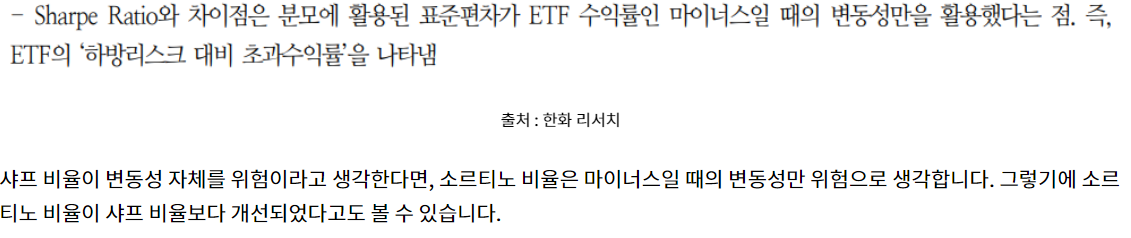

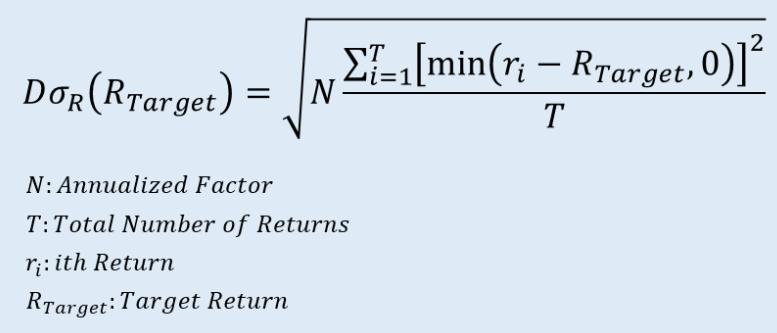

In [59]:
# 하방표준편차 함수 만들기
def downdev(weights, rets, target=0.0):
  ew_w_df = pd.DataFrame(weights, index=rets.index, columns=rets.columns)
  returns = ew_w_df.shift() * rets
  returns = returns.sum(axis=1)
  returns.loc[returns>target] = 0
  sum = (returns ** 2 ).sum()
  return np.sqrt(252*sum/len(returns))

weights = np.random.random(len(tickers))
weights /=np.sum(weights)
weights = np.ones_like(rets) * (weights)
downdev(weights,rets)

0.06619161848329506

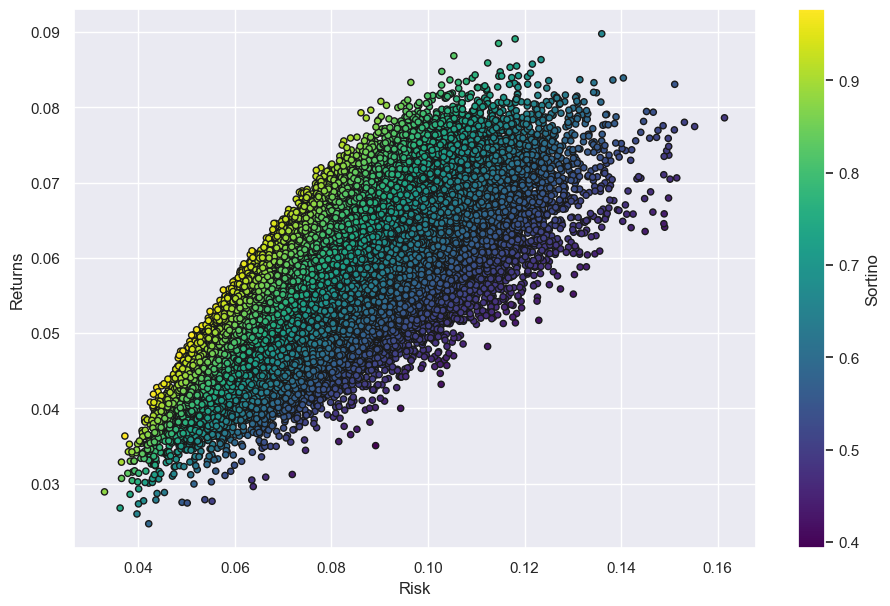

In [60]:
port_ret = []
port_risk = []
port_weights = []
sortino_ratio = []

# 하방표준편차 함수 만들기
def downdev(weights, rets, target=0.0):
  ew_w_df = pd.DataFrame(weights, index=rets.index, columns=rets.columns)
  returns = ew_w_df.shift() * rets
  returns = returns.sum(axis=1)
  returns.loc[returns>target] = 0
  sum = (returns ** 2 ).sum()
  return np.sqrt(252*sum/len(returns))

for _ in range(100000):
  weights = np.random.random(len(tickers))
  weights /=np.sum(weights)
  weight_for_sortino = np.ones_like(rets) * (weights)
  returns = np.dot(weights,er)
  risk = downdev(weight_for_sortino,rets)
  port_ret.append(returns)
  port_risk.append(risk)
  port_weights.append(weights)
  sortino_ratio.append(returns/risk)


portfolio = {'Returns':port_ret,'Risk': port_risk,'Sortino': sortino_ratio}
for i,s in enumerate(tickers):
  portfolio[s] = [weight[i] for weight in port_weights]

df = pd.DataFrame(portfolio)
df = df[['Returns','Risk','Sortino']+[s for s in tickers]]

max_sortino = df.loc[df['Sortino']==df['Sortino'].max()]

df.plot.scatter(x='Risk',y='Returns',c='Sortino',cmap='viridis',edgecolors='k',figsize=[11,7],grid=True)
plt.show()

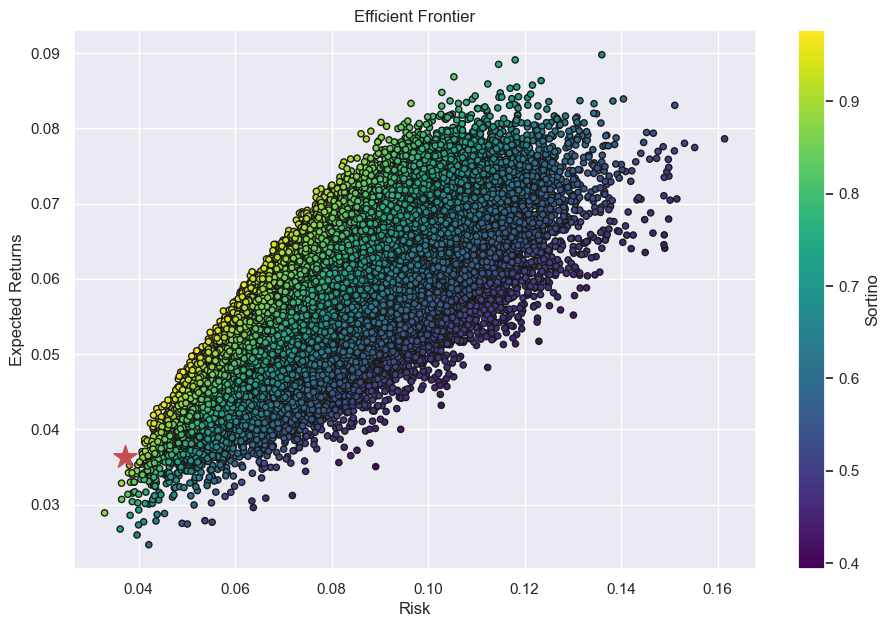

In [61]:
max_sortino = df.loc[df['Sortino']==df['Sortino'].max()]


df.plot.scatter(x='Risk',y='Returns',c='Sortino',cmap='viridis',edgecolors='k',figsize=[11,7],grid=True)
plt.scatter(x=max_sortino['Risk'],y=max_sortino['Returns'],c='r',marker='*',s=300)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

##비교해보기

In [ ]:
max_sortino

,Returns,Risk,Sortino,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
24926,0.136299,0.107426,1.268761,0.022719,0.006948,0.000877,0.018287,0.173853,0.130324,0.340546,0.276474,0.029971


In [ ]:
max_sharpe

,Returns,Risk,Sharpe,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
1711,0.141096,0.155737,0.905989,0.004674,0.020035,0.017829,0.008133,0.250065,0.262326,0.115006,0.280717,0.041217


결과: Return 값은 동일하지만 Volatility(표준편차)를 현저히 줄일 수 있다. 표준편차가 0.154에서 0.107로 내려갔다.

#최소 변동성 포트폴리오

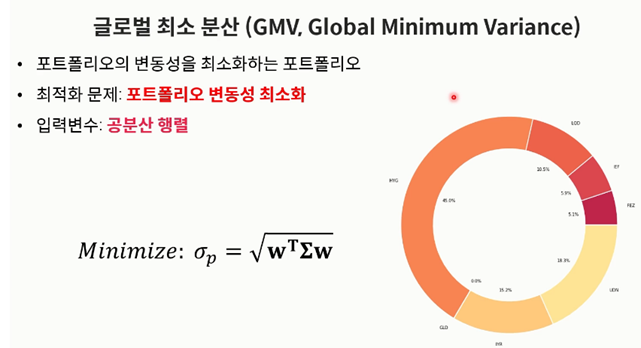

이번에는 샤프지수가 가장 높은 점에 투자하는게 아니라 가장 표준편차가 낮은 점에 투자하는 것이다. 

**(빨간색 점)**



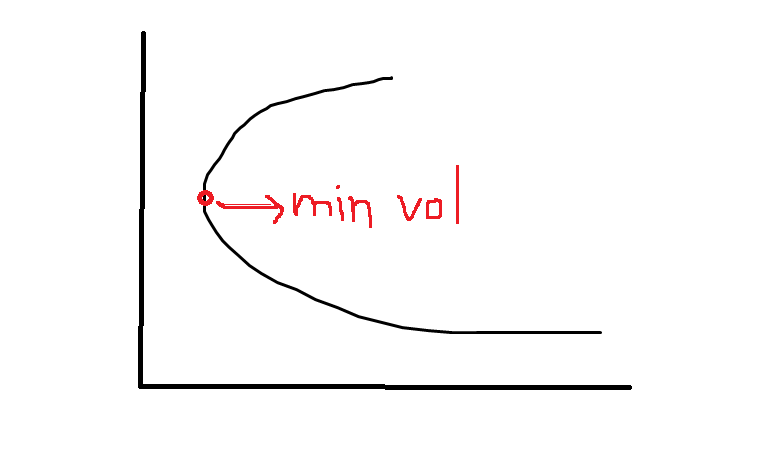




In [36]:
# 샤프비율 최대화 포트폴리오 가중치 산출 함수 구현
def get_gmv_weights(er, cov):

    #자산개수
    noa = er.shape[0]

    #가중치 초기값
    init_guess = np.repeat(1/noa, noa)

    #자산 가중치 상하한
    bounds = ((0.0, 1.0), ) * noa

    #레버리지 불가 제약조건
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    #목적함수
    def min_vol(weights, cov):
      vol = np.sqrt(weights.T @ cov @ weights)
      return vol

    #최적화 수행
    res = sco.minimize(min_vol,
                       init_guess,
                       args=(cov),
                       method='SLSQP',
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    
    return res.x

In [43]:
# GMV 포트폴리오 가중치
gmv_weights = get_gmv_weights(er, cov)

# GMV 포트폴리오 수익률
gmv_ret = np.dot(msr_weights, er)

print('총 수익률: '+str(round((gmv_ret) * 100 , 3)) + '%') # 총 수익률 
# GMV 포트폴리오 변동성
gmv_vol = np.sqrt(np.dot(gmv_weights.T, np.dot(cov, gmv_weights)))
print('변동성: '+str(round((gmv_vol) * 100 , 3)) + '%') # 표준편차 

#가중치 값을 보기 좋게 Series에 넣기
gmv_weights_series = pd.Series(np.round(gmv_weights, 4) * 100, index=tickers)
gmv_weights_series

총 수익률: 14.658%
변동성: 14.052%


XLB     0.00
XLE     0.00
XLF     0.00
XLI     0.00
XLK     0.00
XLP    71.24
XLU    10.26
XLV    18.50
XLY     0.00
dtype: float64

#총 정리:

3차 수업때 배운 것 - 1. 포트폴리오 이론 2. 최소 분산 모형 3. 소르티노 지수






##3차 과제: 지금까지 배운 모형 + 마켓 타이밍 전략들을 활용해서 나만의 투자 포트폴리오를 만들기! (새로운 모형 사용해도 무방)


**우리가 지금까지 배운 모형: 할로윈 전략, 동일가중, 포트폴리오 이론(샤프지수), 포트폴리오 이론(소르티노 지수), 올웨더 포트폴리오, 최소 변동성 포트폴리오, 환율에 따른 가중치 변경**

1. 백테스팅은 2010부터 현재까지로 통일할 것
2. 포트폴리오 수익률과 변동성을 나타낼 것
3. 차트로 시각화할 것

ex1) 횡적 배분모형으로 포트폴리오 이론(소르티노)을 활용하고, 할로윈 전략을 사용한다. 이때 5월 ~ 10월은 KOSPI 200 곱버스에 투자를 한다. 만약 손실이 5% 이상나면 자동 손절한다. .....

ex2) 환율에 따른 주식 가중치 변경